(60, 9)


ValueError: shapes (12,8) and (7,) not aligned: 8 (dim 1) != 7 (dim 0)

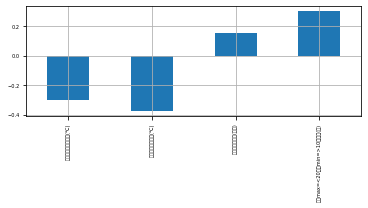

In [14]:
# -*- coding: utf-8 -*-
from sklearn.linear_model import Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn.preprocessing import StandardScaler
import glob
import pandas as pd
import numpy as np
import copy
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import os
import json
import warnings
warnings.filterwarnings('ignore')
##############################
#lassoで機械的に変数を削除して、上位の変数を残す変数に追加してもう一度lassoをかける
##############################

class std_class():
    def __init__(self, data):
        self.data = data 
    #データ標準化
    def std(self):
        data = self.data
        scaler = StandardScaler()
        scaler.fit(data.ix[:,1:])
        scaler.transform(data.ix[:,1:])
        data_std = pd.DataFrame(scaler.transform(data.ix[:,1:]), columns=data.ix[:,1:].columns)
        data_std = pd.concat([data.ix[:,0], data_std],axis=1)
        return data_std


def predict(model, data_path = "data/" ,file_name = "tokyo_2019.csv"):
    data = pd.read_csv(data_path+file_name)
    #classを読み込む
    std_instance = std_class(data)
    data_std = std_instance.std()
    data_std = data
    pred = model.predict(data_std.ix[:,1:])
    pred = pd.DataFrame(pred)
    error = abs((data_std.ix[:,0] - pred.T) / data_std.ix[:,0])
    output = pd.concat([data_std.ix[:,0],pred,error.T], axis=1)
    output.to_csv("./output/predict.csv")
    print(error.T.mean())

'''
lassoで分析して、グラフの表示
'''

def main(data_path = "data/" ,file_name = "tokyo.csv"):
    data = pd.read_csv(data_path+file_name)
    print(data.shape)
#     #標準化
#     sc = StandardScaler()
#     data = sc.fit(data)
    #インスタンス生成
    std_instance = std_class(data)
    data_std = std_instance.std()
    #サンプリング
    X_train, X_test, Y_train, Y_test = train_test_split(data_std.ix[:,2:],data_std.ix[:,1], train_size=0.8,shuffle=False)
    test_data = pd.concat([Y_test, X_test],axis = 1)
#     test_data.to_csv("data/tokyo_2019.csv", index=False)
    #モデリング
    model = Lasso(alpha=0.005,normalize=False,random_state=0)
    model.fit(X_train , Y_train)
    #model = LogisticRegression(penalty ='l1')
    #model.fit(data_std.ix[:,1:] ,data_std.ix[:,0])
    #pandasでグラフ化のため、DF化
    coef = pd.DataFrame(model.coef_)
    coef.index = X_train.columns
    coef.to_csv("./output/coef.csv")
    coef = coef[coef[0] != 0]
    #棒グラフで凡例消すグリッド
    coef.plot(grid=True, kind='bar', legend=False, fontsize=5)
    #軸ラベルつける
    #plt.xticks(list(range(int(pd.DataFrame(X_train.ix[:,1:].columns).count()))),list(X_train.ix[:,1:].columns))
    #plt.xticks([0,1,2,3,4,5,6,7,8,9,10],list(data_std.ix[:,1:].columns))
    plt.subplots_adjust(bottom=0.5)
    plt.savefig(data_path+'../output/graph.png')
    predict(model = model)

if __name__ == '__main__':
    main()



(60, 9)
       東京   入荷量(トン)  　当月の平均気温(℃)  　一月前の平均気温(℃)  日最高気温の平均(℃)  日最低気温の平均(℃)  \
0   1-Jan  1.118363    -1.422666     -1.291424    -1.438595    -1.395820   
1   1-Feb  1.381460    -1.436119     -1.411930    -1.438595    -1.382975   
2   1-Mar  0.843306    -0.817276     -1.425320    -0.734484    -0.882021   
3   1-Apr -0.221042    -0.252246     -0.809400    -0.209853    -0.329688   
4   1-May  0.616086     0.635659     -0.247038     0.770380     0.505235   
5   1-Jun  0.213468     0.770190      0.636674     0.770380     0.762135   
6   1-Jul -0.934593     1.321768      0.770570     1.281206     1.353003   
7   1-Aug -1.723885     1.389033      1.319542     1.336430     1.442918   
8   1-Sep -1.046210     0.837456      1.386490     0.770380     0.916274   
9   1-Oct  1.110390     0.272425      0.837518     0.259555     0.274026   
10  1-Nov  1.632598    -0.332964      0.275156    -0.416944    -0.252618   
11  1-Dec  1.078499    -0.951807     -0.327375    -1.024412    -0.882021   
12  

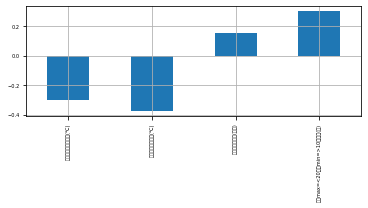

In [39]:
# -*- coding: utf-8 -*-
from sklearn.linear_model import Lasso,LassoCV,ElasticNet,ElasticNetCV
from sklearn.preprocessing import StandardScaler
import glob
import pandas as pd
import numpy as np
import copy
from sklearn.model_selection import KFold, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import os
import json
import warnings
warnings.filterwarnings('ignore')
##############################
#lassoで機械的に変数を削除して、上位の変数を残す変数に追加してもう一度lassoをかける
##############################

class std_class():
    def __init__(self, data):
        self.data = data 
    #データ標準化
    def std(self):
        data = self.data
        scaler = StandardScaler()
        scaler.fit(data.ix[:,1:])
        scaler.transform(data.ix[:,1:])
        data_std = pd.DataFrame(scaler.transform(data.ix[:,1:]), columns=data.ix[:,1:].columns)
        data_std = pd.concat([data.ix[:,0], data_std],axis=1)
        print(data_std)
        return data_std


def predict(model, data_path = "data/" ,file_name = "tokyo_2019.csv"):
    data = pd.read_csv(data_path+file_name)
    #classを読み込む
    std_instance = std_class(data)
    data_std = std_instance.std()
    data_std = data
    pred = model.predict(data_std.ix[:,2:])
    pred = pd.DataFrame(pred)
    error = abs((data_std.ix[:,1] - pred.T) / data_std.ix[:,1])
    output = pd.concat([data_std.ix[:,1],pred,error.T], axis=1)
    output.to_csv("./output/predict.csv")
    print(error.T.mean())
    
'''
lassoで分析して、グラフの表示
'''

def main(data_path = "data/" ,file_name = "tokyo.csv"):
    data = pd.read_csv(data_path+file_name)
    print(data.shape)
    #標準化
    #インスタンス生成
    std_instance = std_class(data)
    data_std = std_instance.std()
    #サンプリング
    X_train, X_test, Y_train, Y_test = train_test_split(data_std.ix[:,2:],data_std.ix[:,1], train_size=0.8,shuffle=False)
    test_data = pd.concat([Y_test, X_test],axis = 1)
#     print(Y_test)
#     print(X_test)
#     test_data.to_csv("data/tokyo_2019.csv", index=False)
    #モデリング
    model = Lasso(alpha=0.005,normalize=False,random_state=0)
    model.fit(X_train , Y_train)
    #model = LogisticRegression(penalty ='l1')
    #model.fit(data_std.ix[:,1:] ,data_std.ix[:,0])
    #pandasでグラフ化のため、DF化
    coef = pd.DataFrame(model.coef_)
    coef.index = X_train.columns
    coef.to_csv("./output/coef.csv")
    coef = coef[coef[0] != 0]
    #棒グラフで凡例消すグリッド
    coef.plot(grid=True, kind='bar', legend=False, fontsize=5)
    #軸ラベルつける
    #plt.xticks(list(range(int(pd.DataFrame(X_train.ix[:,1:].columns).count()))),list(X_train.ix[:,1:].columns))
    #plt.xticks([0,1,2,3,4,5,6,7,8,9,10],list(data_std.ix[:,1:].columns))
    plt.subplots_adjust(bottom=0.5)
    plt.savefig(data_path+'../output/graph.png')
    predict(model = model)

if __name__ == '__main__':
    main()

